In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.isnull().values.any()

False

In [4]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

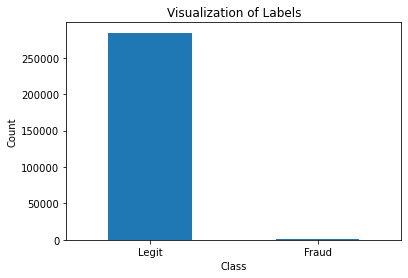

In [5]:
import matplotlib.pyplot as plt

fig = plt.figure()
count_classes = df.Class.value_counts()
count_classes.plot(kind="bar", rot=0)
plt.title("Visualization of Labels")
plt.xlabel("Class")
plt.ylabel("Count")
labels = ["Legit" , "Fraud"]
plt.xticks(range(2),labels)

plt.show()

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df["Normalized_Amount"] = scaler.fit_transform(df["Amount"].values.reshape(-1,1))
df.drop(["Amount","Time"],inplace = True, axis = 1)

X = df.drop(["Class"],axis = 1)
Y = df.Class

In [7]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
x_sm,y_sm = smote.fit_resample(X,Y)
y_sm.value_counts()

0    284315
1    284315
Name: Class, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split
(X_train,X_test,Y_train,Y_test)=train_test_split(x_sm,y_sm,test_size=0.3,random_state=50)

In [9]:
X_train.shape

(398041, 29)

In [10]:
X_test.shape

(170589, 29)

In [14]:

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier


In [15]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
predictions_dt = decision_tree.predict(X_test)
decision_tree_score = decision_tree.score(X_test, Y_test) * 100

print("Decision Tree Score: ", decision_tree_score)

random_forest = RandomForestClassifier(n_estimators= 100)
random_forest.fit(X_train, Y_train)
predictions_rf = random_forest.predict(X_test)
random_forest_score = random_forest.score(X_test, Y_test) * 100

print("Random Forest Score: ", random_forest_score)

Decision Tree Score:  99.7877940547163
Random Forest Score:  99.98827591462522


In [16]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(Y_test,predictions_dt))

print(classification_report(Y_test,predictions_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85644
           1       1.00      1.00      1.00     84945

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85644
           1       1.00      1.00      1.00     84945

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



Text(69.0, 0.5, 'Truth')

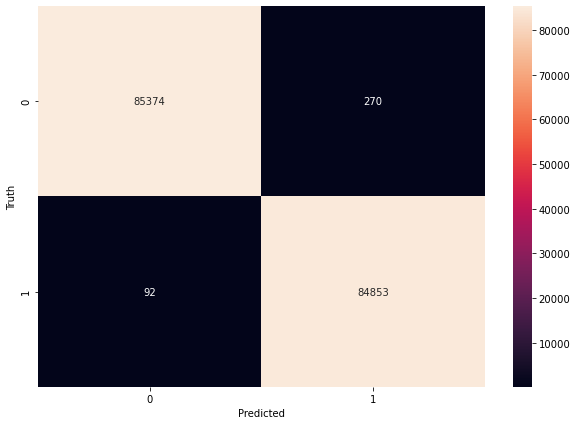

In [17]:
import tensorflow as tf
import seaborn as sn
cm = tf.math.confusion_matrix(labels=Y_test,predictions=predictions_dt)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Text(69.0, 0.5, 'Truth')

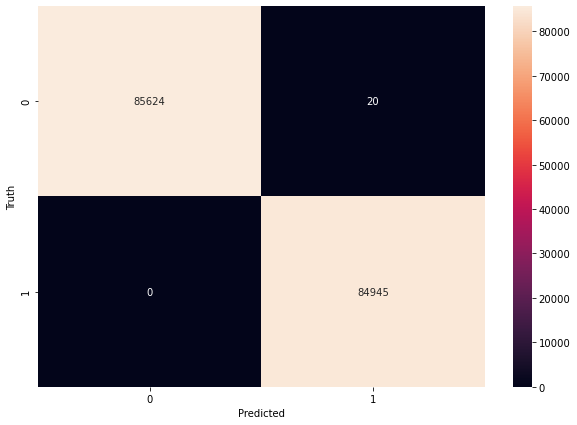

In [18]:
cm = tf.math.confusion_matrix(labels=Y_test,predictions=predictions_rf)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')